Team Members: David Gong, Yolanda Qiu, Evin McDonald, Teja Sirigina, Milan Patel

In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one.
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
cp: '/u

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
import nltk
from nltk import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
import string
from collections import defaultdict
import matplotlib.pyplot as plt
from itertools import combinations
from itertools import product
from sklearn.manifold import MDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
wd = webdriver.Chrome(options=chrome_options)

In [ ]:
# Source: https://towardsdatascience.com/web-scraping-using-selenium-python-8a60f4cf40ab
wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')
#print(wd.page_source)

In [ ]:
time_element = wd.find_element(by=By.XPATH,value='//*[@id="Comment_1726631"]/div/div[2]/div[2]/span/a/time')
time = time_element.text
date = time_element.get_attribute('title')

print(date)
print(time)

March 24, 2002 10:54PM
March 2002


In [ ]:
userid=wd.find_element(by=By.XPATH,value='//*[@id="Comment_1726631"]/div/div[3]/div/div[1]')
userid = userid.text

print(userid)

I personally think that with a few tweaks the C320 could also sit at the top of this group. It's still more of a entry-level luxury sedan than Mercedes would lead you to believe. The C320 "Sport" needs to have it's suspension retuned to accept 17 inch tires without a harsh ride. MB also needs to stop forcing metal trim and black leather on everyone that wants the sport package. The C240's 6-speed wouldn't hurt either if offered on the C320, though it needs to be "fixed" first.

That said, my favorite of the group is (gasp!) the new A4 3.0. The A4 easily has the best interior of any sub-40K car, combine that with stunning looks and a body that is as rigid as any ever made and you have my personal favorite. The single thing I don't like about the A4 is the grey trim around the bottom of the car. This trim doesn't match any of the body colors, as it should be body color anyway. This is an excellent car and in my opinion the best there is under 40K. The upcoming A4 Convertible, Coupe and S

In [ ]:
headers = {"Accept-Language": "en-US,en;q=0.5"}
date = []
message = []

In [ ]:
pages = np.arange(335, 436,1)
print(pages)

[335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435]


In [ ]:
for page in pages:
  page = requests.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"+"/p"+str(page))
  soup = BeautifulSoup(page.text, 'html.parser')
  Comment = soup.find_all('div', {'class': 'Comment'})
  for item in Comment:
    comment = item.find('div',{'class' : 'Message userContent'}).text.strip()
    message.append(comment)

    time = item.find('time')['title']
    date.append(time)


In [ ]:
df_edmunds = pd.DataFrame({"Date" : date, "Message" : message})
df_edmunds

,Date,Message
0,"February 25, 2014 6:50PM",@roadburner\nYou hit the nail on the head. You...
1,"February 25, 2014 7:09PM",now that I have inherited my Acura TL back (a ...
2,"February 25, 2014 7:25PM",@stickguy\nEven with the coil packs you had to...
3,"February 26, 2014 10:59AM",@nyccarguy\nExactly. You have to evaluate all ...
4,"February 26, 2014 11:14AM",@roadburner said:\nnyccarguy\nExactly. You hav...
...,...,...
5028,"July 26, 2020 3:42PM",There's speculation that the ILX name might be...
5029,"July 26, 2020 3:47PM","if they won't bring back Integra, the RSX is a..."
5030,"July 26, 2020 3:54PM","Yes, I'd like to see Acura bring back a hatchb..."
5031,"May 5, 2021 6:35PM",@explorerx4 : How do you like your Lincoln MKZ...


In [ ]:
df_edmunds.to_csv("edmunds.csv")
from google.colab import files
files.download("edmunds.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_edmunds = pd.read_csv('edmunds.csv')
df_edmunds

,Unnamed: 0,Date,Message
0,0,"February 25, 2014 6:50PM",@roadburner\nYou hit the nail on the head. You...
1,1,"February 25, 2014 7:09PM",now that I have inherited my Acura TL back (a ...
2,2,"February 25, 2014 7:25PM",@stickguy\nEven with the coil packs you had to...
3,3,"February 26, 2014 10:59AM",@nyccarguy\nExactly. You have to evaluate all ...
4,4,"February 26, 2014 11:14AM",@roadburner said:\nnyccarguy\nExactly. You hav...
...,...,...,...
5028,5028,"July 26, 2020 3:42PM",There's speculation that the ILX name might be...
5029,5029,"July 26, 2020 3:47PM","if they won't bring back Integra, the RSX is a..."
5030,5030,"July 26, 2020 3:54PM","Yes, I'd like to see Acura bring back a hatchb..."
5031,5031,"May 5, 2021 6:35PM",@explorerx4 : How do you like your Lincoln MKZ...


In [ ]:
df_edmunds['Message'] = df_edmunds['Message'].astype(str)
all = ' '.join(df_edmunds['Message'])

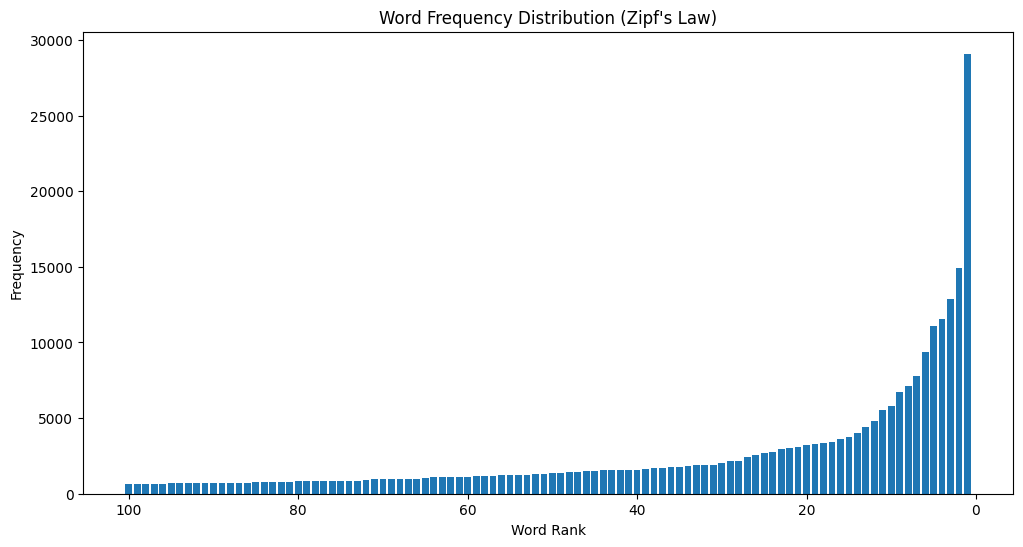

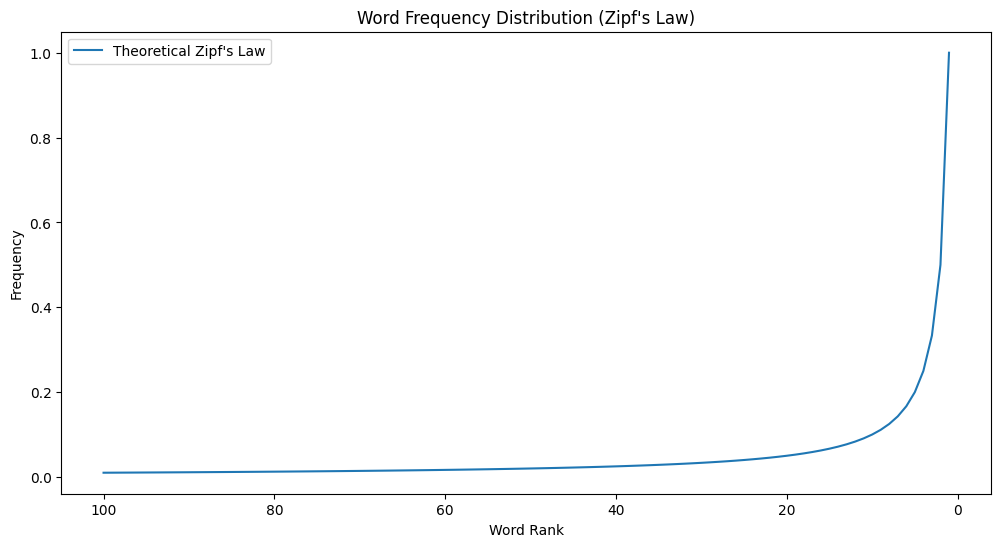

In [ ]:
import pandas as pd

# Load the CSV file containing the comments
df_edmunds = pd.read_csv('edmunds.csv')

# Convert the 'Message' column to strings
df_edmunds['Message'] = df_edmunds['Message'].astype(str)

# Combine all comments into a single text corpus
text_corpus = ' '.join(df_edmunds['Message'])

# Tokenize the text (split into words)
tokens = text_corpus.split()

from collections import Counter

# Calculate word frequencies
word_counts = Counter(tokens)

# Get the most common 100 words
most_common_words = word_counts.most_common(100)
import matplotlib.pyplot as plt

# Extract words and their counts
words, counts = zip(*most_common_words)

# Calculate ranks (1-based)
ranks = range(1, len(words) + 1)

# Plot the most common words against their ranks
plt.figure(figsize=(12, 6))
plt.bar(ranks, counts)
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution (Zipf\'s Law)')
plt.gca().invert_xaxis()  # Invert the x-axis for Zipf's law
plt.show()
# Calculate theoretical frequencies based on Zipf's law
theoretical_frequencies = [1 / rank for rank in ranks]

# Plot the theoretical prediction
plt.figure(figsize=(12, 6))
plt.plot(ranks, theoretical_frequencies, label='Theoretical Zipf\'s Law')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution (Zipf\'s Law)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()


In [ ]:
# Using the Counter object to find the most common words and their counts
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
df_edmunds = pd.read_csv("edmunds.csv")

# Tokenize and get all words
all_words = ' '.join(df_edmunds['Message'].astype(str)).split()

word_freq = Counter(all_words)
common_words = word_freq.most_common(100)


num_common_words = 100
common_words = word_freq.most_common(num_common_words)

for word, freq in common_words:
    print(f"{word}: {freq}")

the: 29096
a: 14942
to: 12885
and: 11528
I: 11114
of: 9339
is: 7803
in: 7146
that: 6754
for: 5811
it: 5522
with: 4822
on: 4418
you: 4043
have: 3741
be: 3647
but: 3435
was: 3351
my: 3278
are: 3251
at: 3059
as: 3053
not: 2952
they: 2787
or: 2709
car: 2530
an: 2419
would: 2178
like: 2138
The: 2046
--: 1923
has: 1895
if: 1891
more: 1813
just: 1765
about: 1763
than: 1730
this: 1727
will: 1628
get: 1601
one: 1581
so: 1575
can: 1565
from: 1558
all: 1525
had: 1520
new: 1440
cars: 1440
what: 1381
think: 1355
BMW: 1313
-: 1310
their: 1246
some: 1246
up: 1228
out: 1222
even: 1174
don't: 1147
do: 1144
me: 1132
we: 1122
no: 1110
your: 1081
when: 1079
I'm: 1043
Audi: 1006
by: 968
much: 966
good: 963
really: 948
it's: 945
there: 882
only: 866
very: 853
been: 853
were: 851
said:: 843
which: 832
over: 824
could: 822
still: 806
other: 791
know: 783
who: 781
any: 769
then: 736
how: 725
want: 715
same: 714
time: 709
better: 708
drive: 693
those: 686
people: 682
make: 682
It: 675
also: 672
them: 648
see: 6

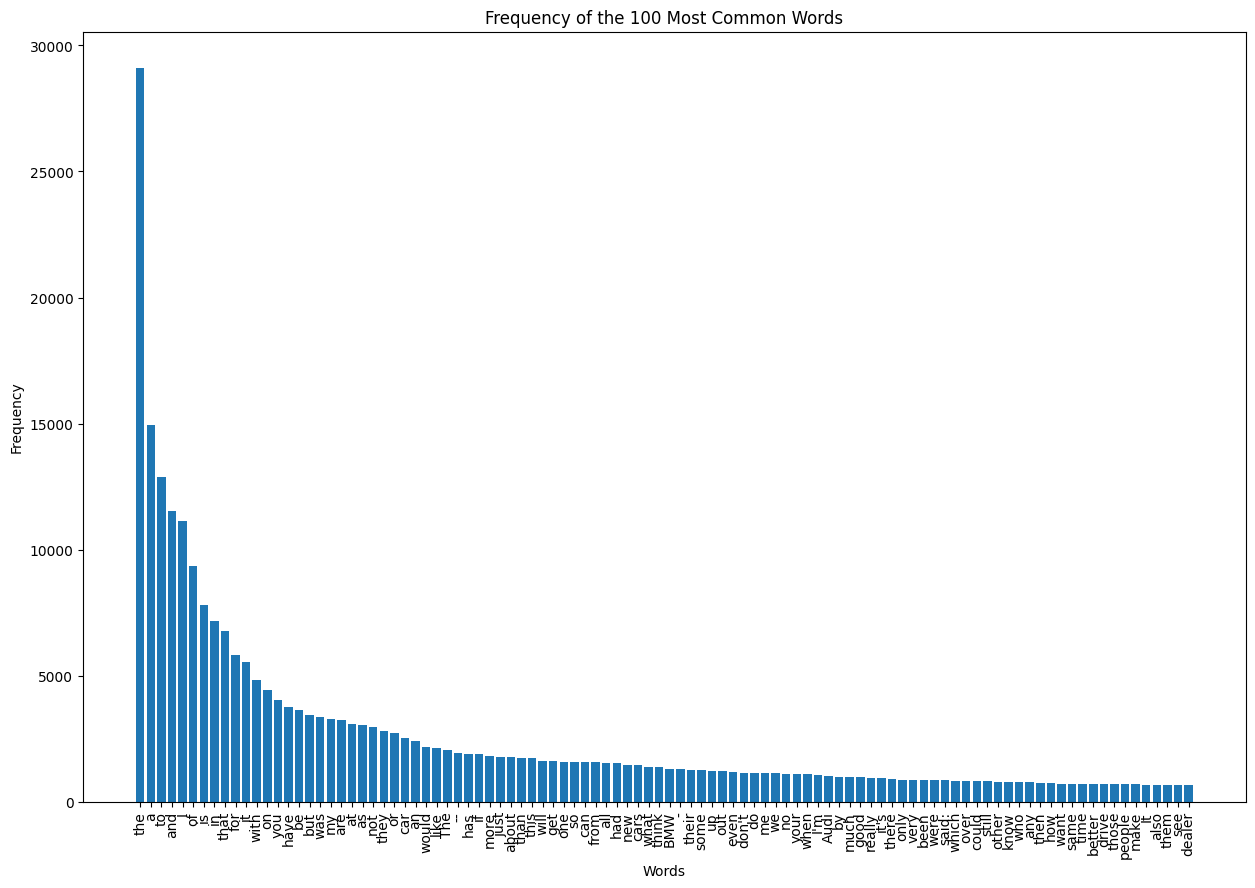

In [ ]:
import matplotlib.pyplot as plt

# Unzipping the words and their frequencies
words, frequencies = zip(*common_words)

# Plotting
plt.figure(figsize=(15,10))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of the 100 Most Common Words')
plt.xticks(rotation=90)
plt.show()


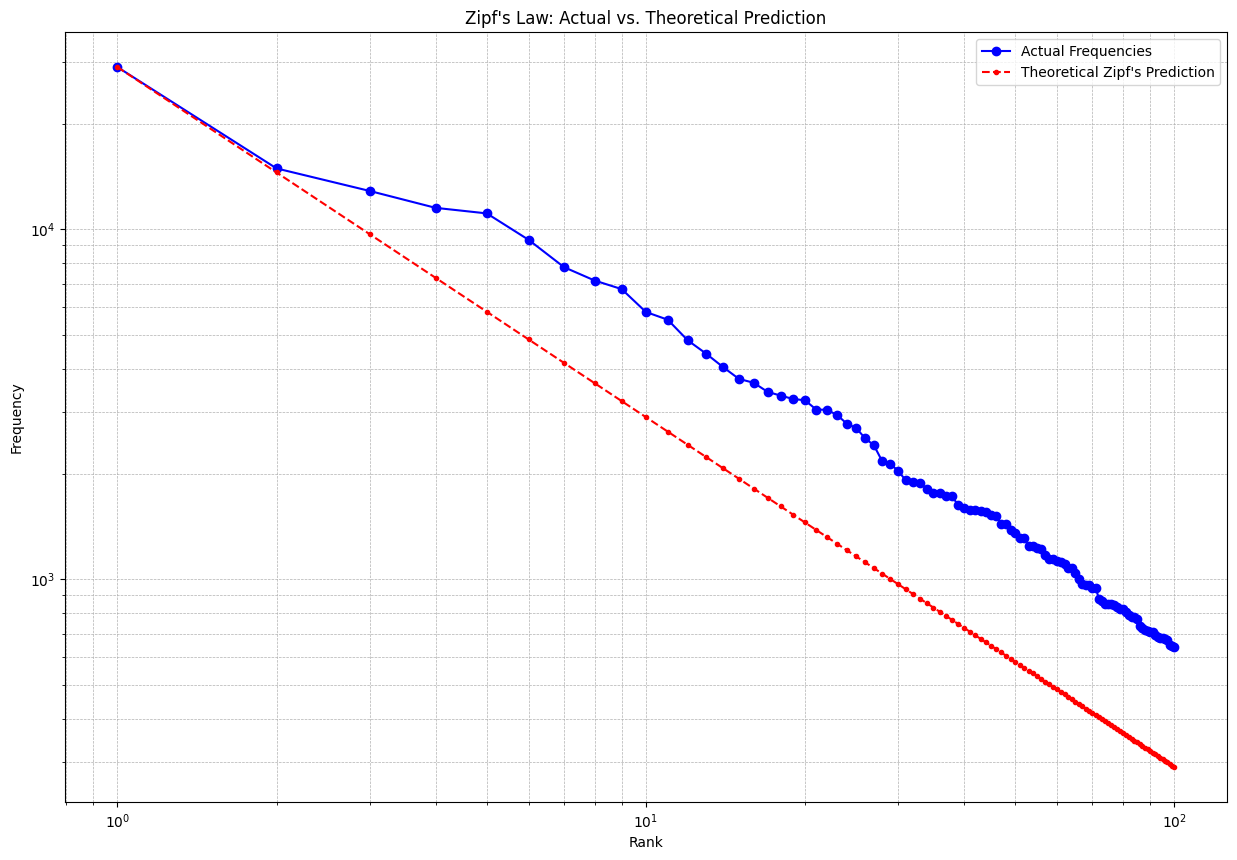

In [ ]:
import numpy as np

# Get actual ranks and frequencies
ranks = np.arange(1, len(frequencies) + 1)
inverse_ranks = 1.0 / ranks

# Normalize the theoretical frequencies so they match the same scale as the actual frequencies
theoretical_frequencies = (frequencies[0] * inverse_ranks)

# Plot
plt.figure(figsize=(15,10))

# Plotting actual frequencies
plt.plot(ranks, frequencies, marker='o', linestyle='-', color='b', label="Actual Frequencies")

# Plotting theoretical prediction by Zipf's law
plt.plot(ranks, theoretical_frequencies, marker='.', linestyle='--', color='r', label="Theoretical Zipf's Prediction")

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law: Actual vs. Theoretical Prediction")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


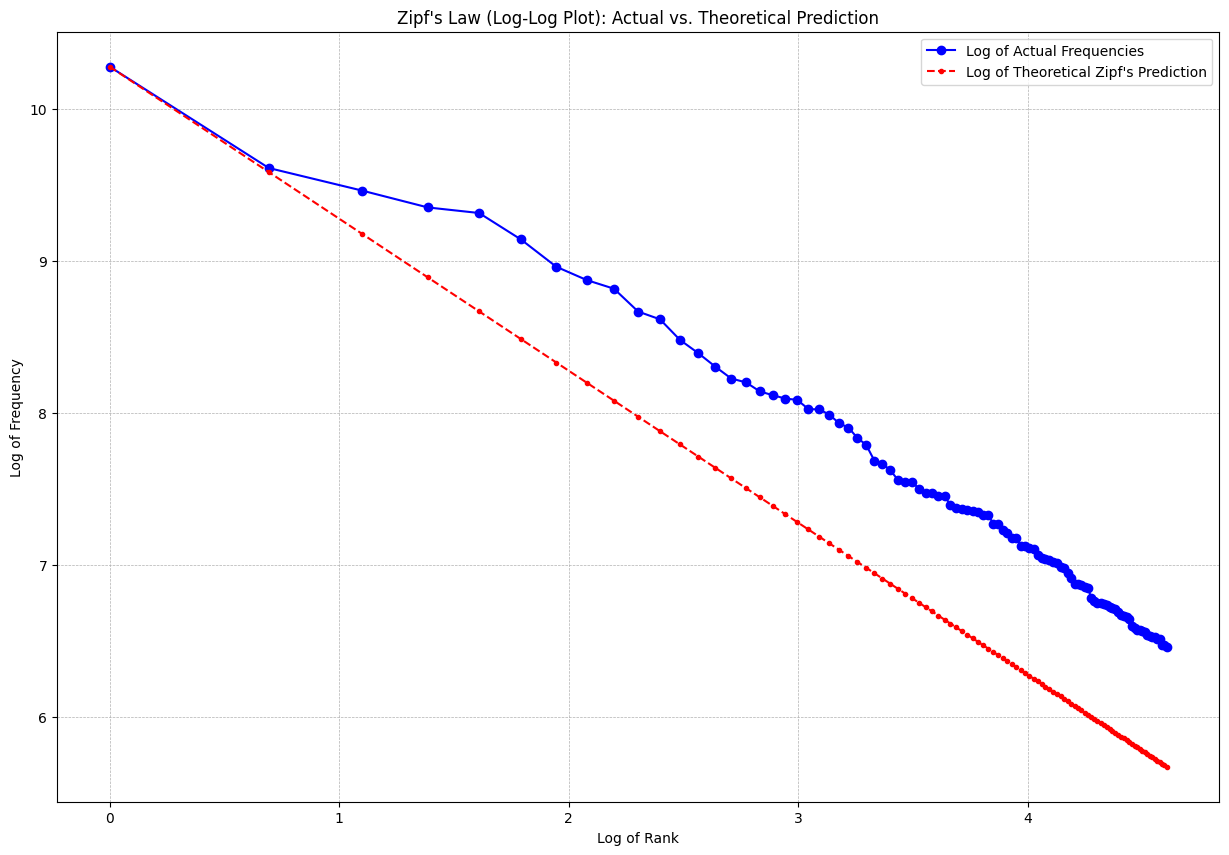

In [ ]:
# Calculating log values for ranks and frequencies
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)
log_theoretical_frequencies = np.log(theoretical_frequencies)

# Plot
plt.figure(figsize=(15,10))

# Plotting log of actual frequencies
plt.plot(log_ranks, log_frequencies, marker='o', linestyle='-', color='b', label="Log of Actual Frequencies")

# Plotting log of theoretical prediction by Zipf's law
plt.plot(log_ranks, log_theoretical_frequencies, marker='.', linestyle='--', color='r', label="Log of Theoretical Zipf's Prediction")

plt.xlabel('Log of Rank')
plt.ylabel('Log of Frequency')
plt.title("Zipf's Law (Log-Log Plot): Actual vs. Theoretical Prediction")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [ ]:
df_edmunds['Message'] = df_edmunds['Message'].astype(str)

# Tokenize messages
df_edmunds['Tokens'] = df_edmunds['Message'].apply(nltk.tokenize.word_tokenize)

# Define stopwords
stop_words = nltk.corpus.stopwords.words('english') + list(string.punctuation)

# Function to remove stopwords
def remove_stopwords(word_tokens):
    return [w for w in word_tokens if w.lower() not in stop_words]

df_edmunds['Tokens'] = df_edmunds['Tokens'].apply(remove_stopwords)

In [ ]:
uploaded = files.upload_file('car_models_and_brands.csv') # Don't run this if the file is already uploaded

Saved car_models_and_brands.csv to /content/car_models_and_brands.csv


In [ ]:
# Load car models and brands
models = pd.read_csv('car_models_and_brands.csv', header=None, names=['Brand','Model'])
values_to_remove = ['car', 'seat', 'problem', 'brand', 'Brand', 'sedan']

# Use boolean indexing to filter rows
filtered_models = models[~models['Brand'].isin(values_to_remove)]
models_dict = dict(zip(filtered_models.Model.str.lower(), filtered_models.Brand.str.lower()))


# Function to replace car models with brands
def replace_with_brand(tokens):
    replaced_tokens = []
    for token in tokens:
        if token.lower() in models_dict:
            replaced_tokens.append(models_dict[token.lower()])
        else:
            replaced_tokens.append(token.lower())
    return replaced_tokens

df_edmunds['Tokens'] = df_edmunds['Tokens'].apply(replace_with_brand)

def remove_duplicates_preserve_order(tokens):
    seen = set()
    unique_tokens = []
    for token in tokens:
        if token not in seen:
            seen.add(token)
            unique_tokens.append(token)
    return unique_tokens
df_edmunds['Tokens'] = df_edmunds['Tokens'].apply(remove_duplicates_preserve_order)
# Get brand frequencies
brand_freq = {}
for tokens in df_edmunds['Tokens']:
    for token in tokens:
        if token in filtered_models['Brand'].str.lower().tolist():
            brand_freq[token] = brand_freq.get(token, 0) + 1

# Display top 10 brands
top_brands = sorted(brand_freq.items(), key=lambda x: x[1], reverse=True)[:10]
df_top_brands = pd.DataFrame(top_brands, columns=['Brand', 'Frequency'])
print('\n \033[1m' + 'Brands with Highest Frequency:' + '\033[0m')
display(df_top_brands)


 Brands with Highest Frequency:


,Brand,Frequency
0,bmw,1275
1,audi,959
2,acura,603
3,honda,520
4,volkswagen,287
5,infiniti,272
6,toyota,257
7,cadillac,253
8,hyundai,243
9,ford,217


In [ ]:
top_10_brands = df_top_brands["Brand"]

def calculate_lift(brand1, brand2, df):
    cooccurrences = 0
    total_messages = len(df)
    min_distance = 7

    for message_tokens in df['Tokens']:
        brand1_mentions = [i for i, token in enumerate(message_tokens) if token == brand1]
        brand2_mentions = [i for i, token in enumerate(message_tokens) if token == brand2]

        for mention1, mention2 in product(brand1_mentions, brand2_mentions):
            distance = abs(mention1 - mention2)
            if distance <= min_distance:
                cooccurrences += 1
                break  # Count only one co-occurrence per message

    prob_brand1 = sum(df['Tokens'].apply(lambda x: x.count(brand1))) / total_messages
    prob_brand2 = sum(df['Tokens'].apply(lambda x: x.count(brand2))) / total_messages
    prob_brand1_and_brand2 = cooccurrences / total_messages
    lift = prob_brand1_and_brand2 / (prob_brand1 * prob_brand2)
    return lift

# Calculate lift ratios between the top-10 brands
lift_results = defaultdict(dict)

for brand1, brand2 in combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, df_edmunds)
    lift_results[brand1][brand2] = lift
    lift_results[brand2][brand1] = lift

#Display the lift ratios
for brand1, values in lift_results.items():
    for brand2, lift in values.items():
        print(f"Lift({brand1}, {brand2}): {lift}")

Lift(bmw, audi): 0.6256648060684128
Lift(bmw, acura): 0.24876142164992032
Lift(bmw, honda): 0.2125550527903469
Lift(bmw, volkswagen): 0.2338211382113821
Lift(bmw, infiniti): 0.42086793540945794
Lift(bmw, toyota): 0.2611154345006485
Lift(bmw, cadillac): 0.3900643261257073
Lift(bmw, hyundai): 0.24366981360445417
Lift(bmw, ford): 0.21829222011385202
Lift(audi, bmw): 0.6256648060684128
Lift(audi, acura): 0.5483168101100337
Lift(audi, honda): 0.25231611454239194
Lift(audi, volkswagen): 0.5668760650067398
Lift(audi, infiniti): 0.7139061829111207
Lift(audi, toyota): 0.22463006617626177
Lift(audi, cadillac): 0.705288364444188
Lift(audi, hyundai): 0.38875371722087054
Lift(audi, ford): 0.04837027817955532
Lift(acura, bmw): 0.24876142164992032
Lift(acura, audi): 0.5483168101100337
Lift(acura, honda): 0.8025577241995152
Lift(acura, volkswagen): 0.14541115560409337
Lift(acura, infiniti): 2.025278021656424
Lift(acura, toyota): 0.3572474850133251
Lift(acura, cadillac): 0.5608387574643253
Lift(acura, 

In [ ]:
lift_df_table = pd.DataFrame.from_dict(lift_results) #after doing this, the bmw row is at the bottom since the above section does not compare bmw in column 1 with bmw in column 2. Thus, bmw appears for the first time in column 2 after all the others.
row_to_move_index = 'bmw' #so we are moving it to the top
row_to_move = lift_df_table.loc[row_to_move_index]
lift_df_table = pd.concat([row_to_move.to_frame().T, lift_df_table.drop(row_to_move_index)])
lift_df_table.round(2).replace(np.nan,'',regex = True)

,bmw,audi,acura,honda,volkswagen,infiniti,toyota,cadillac,hyundai,ford
bmw,,0.63,0.25,0.21,0.23,0.42,0.26,0.39,0.24,0.22
audi,0.63,,0.55,0.25,0.57,0.71,0.22,0.71,0.39,0.05
acura,0.25,0.55,,0.8,0.15,2.03,0.36,0.56,0.45,0.15
honda,0.21,0.25,0.8,,0.67,0.32,1.43,0.11,0.68,0.49
volkswagen,0.23,0.57,0.15,0.67,,0.32,0.2,0.28,0.36,0.81
infiniti,0.42,0.71,2.03,0.32,0.32,,0.22,1.1,0.3,0.17
toyota,0.26,0.22,0.36,1.43,0.2,0.22,,0.7,1.21,0.36
cadillac,0.39,0.71,0.56,0.11,0.28,1.1,0.7,,0.33,0.18
hyundai,0.24,0.39,0.45,0.68,0.36,0.3,1.21,0.33,,0.67
ford,0.22,0.05,0.15,0.49,0.81,0.17,0.36,0.18,0.67,


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


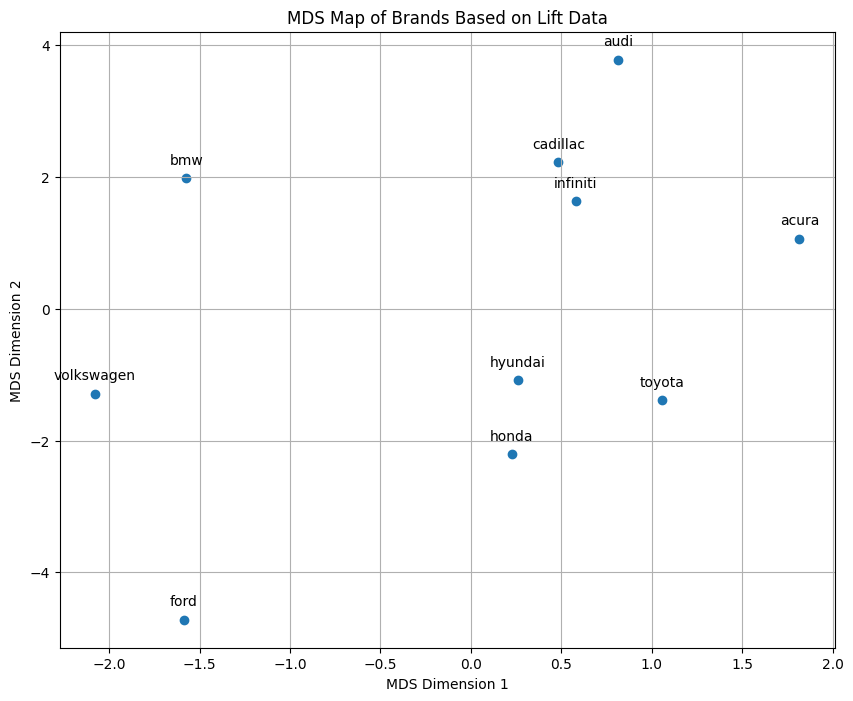

In [ ]:
unique_brands = set(brand1 for brand1 in lift_results.keys() for brand2 in lift_results[brand1].keys())

# Create an empty dissimilarity matrix filled with zeros
n_brands = len(unique_brands)
dissimilarity_matrix = np.zeros((n_brands, n_brands))

# Fill the dissimilarity matrix with inverse lift values, ignoring zero lifts
for i, brand1 in enumerate(unique_brands):
    for j, brand2 in enumerate(unique_brands):
        if i != j:
            lift_value = lift_results.get(brand1, {}).get(brand2, 0)
            if lift_value != 0:
                dissimilarity_matrix[i, j] = 1 / lift_value

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
brand_positions = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the MDS results
unique_brands_list = list(unique_brands)
mds_df = pd.DataFrame(brand_positions, columns=['X', 'Y'], index=unique_brands_list)

# Plot the MDS map
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['X'], mds_df['Y'])

# Annotate points with brand names
for brand, (x, y) in mds_df.iterrows():
    plt.annotate(brand, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('MDS Map of Brands Based on Lift Data')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)

# Show the plot
plt.show()

E. From the lift ratios and the MDS map, we can discern which brands associate or could potentially compete with one another. Notably, Cadillac and Infiniti share a significant association with a lift ratio of 1.1. A ratio greater than 1 indicates that an interest in Infiniti significantly influences interest in Cadillac, and vice versa, more than if the two were considered independently. This suggests that customers inclined towards Infiniti are also likely to consider Cadillac. The proximity of these brands on the MDS map reinforces their competitive relationship.

Similarly, Infiniti and Acura exhibit a strong positive association, evidenced by a lift ratio of 2.03. Their closeness on the MDS map further underscores their competitive alignment, designating Acura as another primary competitor for Infiniti.

The established rivalry between Honda and Toyota is reflected by a lift ratio of 1.43, emphasizing their long-standing competition in terms of product offerings, target demographics, and market segments. Additionally, Toyota and Hyundai appear to be potential competitors, given their lift ratio of 1.21, indicating a robust mutual association in consumer preferences.

In conclusion, Infiniti's main competitors appear to be Cadillac and Acura, while Honda and Toyota remain closely aligned rivals. Other brands, such as BMW, Volkswagen, and Audi, display weak or independent associations with their counterparts. This suggests either a lack of competitive interaction or insignificant co-mention in consumer purchasing patterns. As consumers, understanding these associations can guide our decision-making process when selecting a vehicle, offering insights into comparable brands to consider.

In [ ]:
stop_words = nltk.corpus.stopwords.words('english') + list(string.punctuation)
word_freq_dict = dict(word_freq)
rows = []
for key, value in word_freq_dict.items():
    row = {'element': key, 'count': value}
    rows.append(row)
word_freq_df = pd.DataFrame(rows)
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)


In [ ]:
fword_freq = {}
for tokens in df_edmunds['Tokens']:
    for token in tokens:
        if token not in filtered_models['Brand'].str.lower().tolist():
            fword_freq[token] = fword_freq.get(token, 0) + 1


In [ ]:
top_fwords = sorted(fword_freq.items(), key=lambda x: x[1], reverse=True)[:100]
df_top_fwords = pd.DataFrame(top_fwords, columns=['Word', 'Frequency'])
print('\n \033[1m' + 'Words with Highest Frequency:' + '\033[0m')
display(df_top_fwords)


 Words with Highest Frequency:


,Word,Frequency
0,'s,2220
1,n't,2115
2,said,2105
3,car,1842
4,like,1520
...,...,...
95,actually,332
96,looking,332
97,always,332
98,next,331


Selected these terms by taking the highest frequency word and selecting the ones that can be called an attribute. The selected terms were years for how long a car has been around, engine for describing the health of the car, miles for how much the car has been used, performance for the car's shape, and price for how expensive cars are.

In [ ]:
attributes = ['years', 'engine', 'miles', 'performance', 'price'] #from the above, index of these terms is: (27,83,55,78,34)

attribute_freq = {}
for attr in attributes:
    attribute_freq[attr] = sum(df_edmunds['Tokens'].apply(lambda x: x.count(attr)))


top_attributes = sorted(attribute_freq.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 attributes:", top_attributes)


brand_attribute_association = defaultdict(lambda: defaultdict(int))

for index, row in df_edmunds.iterrows():
    tokens = row['Tokens']
    for brand in top_10_brands:
        if brand in tokens:
            for attr, _ in top_attributes:
                if attr in tokens:
                    brand_attribute_association[brand][attr] += 1


for brand, attr_counts in brand_attribute_association.items():
    print(f"For brand {brand}, top attributes are:")
    sorted_attrs = sorted(attr_counts.items(), key=lambda x: x[1], reverse=True)
    for attr, count in sorted_attrs:
        print(f"   {attr}: {count}")


Top 5 attributes: [('years', 614), ('price', 566), ('miles', 451), ('performance', 373), ('engine', 363)]
For brand ford, top attributes are:
   price: 45
   years: 40
   performance: 35
   engine: 21
   miles: 18
For brand acura, top attributes are:
   years: 135
   price: 99
   miles: 77
   engine: 77
   performance: 73
For brand toyota, top attributes are:
   years: 79
   price: 49
   miles: 40
   performance: 35
   engine: 22
For brand infiniti, top attributes are:
   years: 62
   price: 48
   performance: 39
   miles: 38
   engine: 32
For brand audi, top attributes are:
   price: 202
   years: 175
   performance: 135
   miles: 130
   engine: 111
For brand bmw, top attributes are:
   price: 255
   years: 219
   performance: 162
   engine: 143
   miles: 125
For brand cadillac, top attributes are:
   years: 58
   price: 55
   performance: 32
   miles: 16
   engine: 12
For brand honda, top attributes are:
   years: 109
   price: 92
   miles: 83
   engine: 60
   performance: 55
For bra

In [ ]:
# Calculate lift ratios between the top-10 brands and these attributes
lift_results_ba = defaultdict(dict)

for brand in top_10_brands:
    for attribute in attributes:
      lift = calculate_lift(brand, attribute, df_edmunds)
      lift_results_ba[attribute][brand] = lift

#Display the lift ratios
for attribute, values in lift_results_ba.items():
    for brand, lift in values.items():
        print(f"Lift({attribute}, {brand}): {lift}")

Lift(years, bmw): 0.19930127099699815
Lift(years, audi): 0.22223543118000905
Lift(years, acura): 0.24468860907190434
Lift(years, honda): 0.2679810824354798
Lift(years, volkswagen): 0.1428060697545086
Lift(years, infiniti): 0.39177165165740563
Lift(years, toyota): 0.3827424935677258
Lift(years, cadillac): 0.2591958388587761
Lift(years, hyundai): 0.2361295424994303
Lift(years, ford): 0.37774508773773247
Lift(engine, bmw): 0.33711013882136875
Lift(engine, audi): 0.21686674307775833
Lift(engine, acura): 0.2989140614649434
Lift(engine, honda): 0.15998092816274634
Lift(engine, volkswagen): 0.38648122018410264
Lift(engine, infiniti): 0.2548715767298655
Lift(engine, toyota): 0.10789893987630102
Lift(engine, cadillac): 0.05480242598460349
Lift(engine, hyundai): 0.17117300955684794
Lift(engine, ford): 0.19168221807517996
Lift(miles, bmw): 0.1663005956262771
Lift(miles, audi): 0.2676452975545018
Lift(miles, acura): 0.38864436134184954
Lift(miles, honda): 0.34337369947126045
Lift(miles, volkswagen

In [ ]:
lift_df_table_ba = pd.DataFrame.from_dict(lift_results_ba)
lift_df_table_ba.round(2) # rounding for readability

,years,engine,miles,performance,price
bmw,0.20,0.34,0.17,0.25,0.24
audi,0.22,0.22,0.27,0.25,0.21
acura,0.24,0.30,0.39,0.13,0.19
honda,0.27,0.16,0.34,0.16,0.19
volkswagen,0.14,0.39,0.16,0.24,0.15
infiniti,0.39,0.25,0.04,0.20,0.03
toyota,0.38,0.11,0.30,0.42,0.31
cadillac,0.26,0.05,0.13,0.05,0.21
hyundai,0.24,0.17,0.09,0.00,0.37
ford,0.38,0.19,0.00,0.44,0.37


F: Price, performance, engine, interior, and mileage emerge as the top five focal points in the discussions surrounding the mentioned brands on the discussion board. It's important to note that our analysis did not delve into sentiment, making it challenging to ascertain whether frequent mentions of "price" or "performance" reflect a positive or negative sentiment. Nonetheless, these recurring themes offer valuable insights into what customers prioritize when evaluating a brand or vehicle. These five facets collectively suggest that customers are in pursuit of a high-quality experience that justifies their expenditure. Notably, "price" takes precedence, closely followed by "performance."

G:
The concept of "value" proves multifaceted, as evidenced by the frequent references to both "engine" and "interior." It is prudent for individual companies to conduct further investigations into their distinct customer base to gain a deeper understanding of what holds value for their clientele. Tailoring improvements to align with these specific preferences can enhance overall customer satisfaction and brand loyalty. On the other hand, when customers are selecting a brand, they should consider the attributes most closely associated with that particular brand to make more informed decisions.For example, Volkswagen is predominantly linked with the attribute 'engine', while Acura aligns more with 'miles'. Meanwhile, discussions about Ford often emphasize its performance. This analysis offers valuable insights into customer preferences based on these specific attributes.

In [ ]:
# create synonyms
aspirational_synonyms = ["desire", "wish", "quality", "dream", "hope", "love", "like", "eager"]

total_entries = len(df_edmunds)

brand_aspirational_lift = defaultdict(lambda: defaultdict(float))

for brand in top_10_brands:
    for synonym in aspirational_synonyms:
        prob_brand = sum(df_edmunds['Tokens'].apply(lambda x: x.count(brand))) / total_entries
        prob_synonym = sum(df_edmunds['Tokens'].apply(lambda x: x.count(synonym))) / total_entries
        prob_together = sum(df_edmunds['Tokens'].apply(lambda x: brand in x and synonym in x)) / total_entries

        if prob_brand and prob_synonym:
            lift = prob_together / (prob_brand * prob_synonym)
            brand_aspirational_lift[brand][synonym] = lift

# Compute aggregated lift values for each brand for lift values greater than 1
brand_aspiration_score = {}
for brand, synonyms_lift in brand_aspirational_lift.items():
    brand_aspiration_score[brand] = sum([lift for lift in synonyms_lift.values() if lift > 1])

# Identify the most aspirational brand
most_aspirational_brand = max(brand_aspiration_score, key=brand_aspiration_score.get)
print(f"The most aspirational brand is: {most_aspirational_brand} with a total lift score of {brand_aspiration_score[most_aspirational_brand]}")

# Printing aggregated lift values for each brand
print("\nAggregated Lift Values for Each Brand:")
for brand, score in sorted(brand_aspiration_score.items(), key=lambda x: x[1], reverse=True): # Sorted for better visualization
    print(f"{brand}: {score}")

# Printing individual lift values for aspirational synonyms for each brand
print("\nDetailed Lift Values:")
for brand, synonyms_lift in brand_aspirational_lift.items():
    print(f"\n{brand}:")
    for synonym, lift in synonyms_lift.items():
        print(f" {synonym}: {lift}")


The most aspirational brand is: volkswagen with a total lift score of 21.391049507801753

Aggregated Lift Values for Each Brand:
volkswagen: 21.391049507801753
audi: 19.041120213440614
toyota: 15.485474166292825
bmw: 13.573828383992472
honda: 12.722583099293622
acura: 11.657910120223553
ford: 11.184937112526248
cadillac: 11.076123090854212
hyundai: 9.582303903218458
infiniti: 6.84990463306543

Detailed Lift Values:

bmw:
   desire: 1.3816078431372547
   wish: 1.6003179650238475
   quality: 1.4170336852689793
   dream: 2.5658431372549018
   hope: 1.654169934640523
   love: 1.6358805864688215
   like: 1.345249742002064
   eager: 1.9737254901960786

audi:
   desire: 3.4113138686131386
   wish: 1.3475044387453146
   quality: 1.9736727181982656
   dream: 2.0992700729927005
   hope: 1.4994786235662148
   love: 1.9148747287433419
   like: 1.5468305800998847
   eager: 5.248175182481752

acura:
   desire: 2.0866500829187395
   wish: 1.0151270673658734
   quality: 2.1401539311987077
   dream: 1.

Our analysis included using synonyms of aspirational and other words that are related to wanting to buy. We calculated lift ratios for each of these words per brand and summed up the lifts that had positive associations (we called this total lift score). The brand with the highest total lift score is what we considered the most aspirational brand; Volkswagon had the highest total lift score and therefore is the most aspirational brand. Because of this, Volkswagon should focus on customer loyalty and offering premium services/products. Clearly, customers are happy with Volkswagon and want to buy one, therefore, Volkswagon should try to keep customers loyal to encourage more/future purchases. In other words, fostering a sense of allegiance among existing customers will not only enhance retention rates but also stimulate further purchases in the future. In addition, becuase people are happy with Volkswagon's product's, the company should try offering premium services as customers may be willing to pay more knowing the quality of Volkswagon is high.This strategic move not only capitalizes on existing customer satisfaction but also positions Volkswagen as a premium brand, potentially attracting a broader customer base seeking top-tier experiences and products.




